# Assignment 4: CNN

## Description

Implement a Convolutional Neural Network (CNN) classifier to predict whether a given icon image is the real / fake. Where the fake images were generated by TAs with a neural network.

- You are not required to use Colab in this assignment, but you have to **submit your source code**.

## Dataset

- https://lab.djosix.com/icons.zip
- 64x64 RGB jpg images


```
real/           (10000 images)
    0000.jpg
    0001.jpg
    ...
    9999.jpg
fake/           (10000 images)
    0000.jpg
    0001.jpg
    ...
    9999.jpg
unknown/        (5350 images, testing set)
    0000.jpg
    0001.jpg
    ...
    5349.jpg
```

- Training set
  - 20000 icons in `real/` and `fake/`
  - You should predict 1 for icons in `real/` and 0 for icons in `fake/`
- Testing set:
  - 5350 icons in `unknown/`
  - Your score depends on the **accuracy** on this testing set,  
    so the prediction of each icon in `unknown/` should be submitted (totally 5350 predictions, see below).


## Submission

Please upload **2 files** to E3. (`XXXXXXX` is your student ID)

1. **`XXXXXXX_4_result.json`**  
  This file contains your model prediction for the testing set.  
  You must generate this file with the function called `save_predictions()`.
2. **`XXXXXXX_4_source.zip`**  
  Zip your source code into this archive.


## Hints

- **Deep Learning Libraries**: You can use any deep learning frameworks (PyTorch, TensorFlow, ...).
- **How to implement**: There are many CNN examples for beginners on the internet, e.g. official websites of the above libraries, play with them and their model architectures to abtain high accuracy on testing set.
- **GPU/TPU**: Colab provides free TPU/GPU for training speedup, please refer to [this page in `pytut.pdf` on E3](https://i.imgur.com/VsrUh7I.png).


# **Loading the images and putting them in places**
*How to move files in google colab : https://stackoverflow.com/questions/51109931/moving-files-in-google-colab*

In [1]:
!wget https://lab.djosix.com/icons.zip
!unzip icons.zip
!mkdir icons
!mv "/content/fake" "/content/icons"
!mv "/content/real" "/content/icons"
!mv "/content/unknown" "/content/icons"

串流輸出內容已截斷至最後 5000 行。
  inflating: unknown/4693.jpg        
  inflating: unknown/1355.jpg        
  inflating: unknown/0981.jpg        
  inflating: unknown/2268.jpg        
  inflating: unknown/1822.jpg        
  inflating: unknown/4662.jpg        
  inflating: unknown/4587.jpg        
  inflating: unknown/1475.jpg        
  inflating: unknown/1198.jpg        
  inflating: unknown/0050.jpg        
  inflating: unknown/5022.jpg        
  inflating: unknown/0654.jpg        
  inflating: unknown/3375.jpg        
  inflating: unknown/2338.jpg        
  inflating: unknown/2179.jpg        
  inflating: unknown/1026.jpg        
  inflating: unknown/2835.jpg        
  inflating: unknown/4360.jpg        
  inflating: unknown/4778.jpg        
  inflating: unknown/3814.jpg        
  inflating: unknown/3656.jpg        
  inflating: unknown/1125.jpg        
  inflating: unknown/5040.jpg        
  inflating: unknown/0953.jpg        
  inflating: unknown/3972.jpg        
  inflating: unknown/3773.jpg

# **Importing libraries and print out a img to check whether the datadir is correct**

7735.jpg


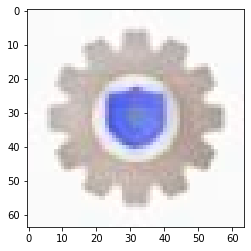

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/icons"
CATEGORIES = ["fake", "real"]

for category in CATEGORIES:  # do fake and real
    path = os.path.join(DATADIR,category)  # create path to fake and real
    for img in os.listdir(path):  # iterate over each image per fake and real
        print(img)
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        break
    break


# **Checking img_array**

In [3]:
print(img_array.shape)
print(img_array)

(64, 64, 3)
[[[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 ...

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]]


# **Showing resized img in 64 x 64 (resizing is not necessary in this case)**

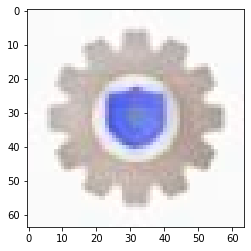

In [4]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

# **Preparing training data**

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do fake and real
        path = os.path.join(DATADIR,category)  # create path to fake and real
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=fake 1=real
        for img in tqdm(os.listdir(path)):  # iterate over each image per real and fake
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()
print("")
print("the shape of training data is :", len(training_data))

100%|██████████| 10000/10000 [00:01<00:00, 9823.59it/s]


the shape of training data is : 20000


# **Shuffle the training data to balance**

In [7]:
# shuffling
import random

random.shuffle(training_data)

# print out the training data to see if it's shuffled
print("labels of the training_data")
for sample in training_data[:10]:
    print(sample[1])

# check training_data
print("shape of the training_data:", len(training_data))
print("Training_data: ")
print(training_data[:1])

labels of the training_data
1
1
0
1
1
0
0
1
0
1
shape of the training_data: 20000
Training_data: 
[[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 252, 251],
        [255, 250, 248],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 255, 255],
        [252, 255, 253],
        [255, 255, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[244, 255, 253],
        [246, 253, 250],
        [255

# **Reshaping the X and y to the tf requested shape**

In [8]:
# reshape X and y(X = data, y = label)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

# **Saving the modified data so that we don't have to do it all again(Not necessary)**

In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# **Start training**

In [9]:
# start training a model!
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


'''
For cases that want to read data from pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
'''

X = X/255.0   # Normalizing

model = Sequential()
##################################### input shape may need to modify??
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=25, validation_split=0.3)


Epoch 1/25
438/438 [==============================] - 36s 9ms/step - loss: 0.6822 - accuracy: 0.5631 - val_loss: 0.6697 - val_accuracy: 0.6258
Epoch 2/25
438/438 [==============================] - 4s 9ms/step - loss: 0.6436 - accuracy: 0.6251 - val_loss: 0.6829 - val_accuracy: 0.5723
Epoch 3/25
438/438 [==============================] - 4s 9ms/step - loss: 0.6260 - accuracy: 0.6533 - val_loss: 0.6064 - val_accuracy: 0.6708
Epoch 4/25
438/438 [==============================] - 4s 9ms/step - loss: 0.6168 - accuracy: 0.6599 - val_loss: 0.5958 - val_accuracy: 0.6882
Epoch 5/25
438/438 [==============================] - 4s 9ms/step - loss: 0.5979 - accuracy: 0.6754 - val_loss: 0.6276 - val_accuracy: 0.6295
Epoch 6/25
438/438 [==============================] - 4s 9ms/step - loss: 0.5843 - accuracy: 0.6888 - val_loss: 0.5744 - val_accuracy: 0.7027
Epoch 7/25
438/438 [==============================] - 4s 9ms/step - loss: 0.5671 - accuracy: 0.7047 - val_loss: 0.5550 - val_accuracy: 0.7120
Epoch

In [10]:
# Checking X and y
print("################################this is X: #############################")
print(X)
print("################################this is y: #############################")
print(y)

################################this is X: #############################
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         0.98823529 0.98431373]
   [1.         0.98039216 0.97254902]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.      

# **Predicting**
*Keras' model.predict() returns an array of shape (n_samples, 1)*

*Have to round it before appending to predict_list!!!!!!!*

*ref : https://stackoverflow.com/questions/48619132/binary-classification-predict-method-sklearn-vs-keras*

In [11]:
# start predicting yay!
CATEGORIES = ["fake", "real"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 64
    img_array = cv2.imread(filepath)  # read in the image
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with shaping that TF wants.
    new_array = new_array / 255.0  # Normalizing
    return new_array

predicting_path = "/content/icons/unknown"
prediction_list = []

for img in sorted(os.listdir(predicting_path)):
    prediction = model.predict(prepare(os.path.join(predicting_path,img)))
    if prediction[0][0] > 0.5:
      prediction_list.append(1)
    else:
      prediction_list.append(0)

print(prediction_list)

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 

# **Saving the predictions**
### Include this in your code to generate result file

In [12]:
import json

def save_predictions(student_id, predictions):
  # Please use this function to generate 'XXXXXXX_4_result.json'
  # `predictions` is a list of int (0 or 1; fake=0 and real=1)
  # For example, `predictions[0]` is the prediction given "unknown/0000.jpg".
  # it will be 1 if your model think it is real, else 0 (fake).

    assert isinstance(student_id, str)
    assert isinstance(predictions, list)
    assert len(predictions) == 5350

    for y in predictions:
        assert y in (0, 1)

    with open('{}_4_result.json'.format(student_id), 'w') as f:
        json.dump(predictions, f)

save_predictions('0816039', prediction_list)
